<a href="https://colab.research.google.com/github/dikshanasa/Sem_7_ASTW/blob/main/ASTMA_ALL_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# reading and wragling data
df_avatar = pd.read_csv('avatar.csv', engine='python',encoding = 'unicode_escape')
df_avatar_lines = df_avatar.groupby('character').count()
df_avatar_lines = df_avatar_lines.sort_values(by=['character_words'], ascending=False)[:10]
top_character_names = df_avatar_lines.index.values

# filtering out non-top characters
df_character_sentiment = df_avatar[df_avatar['character'].isin(top_character_names)]
df_character_sentiment = df_character_sentiment[['character', 'character_words']]

# calculating sentiment score
sid = SentimentIntensityAnalyzer()
df_character_sentiment.reset_index(inplace=True, drop=True)
df_character_sentiment[['neg', 'neu', 'pos', 'compound']] = df_character_sentiment['character_words'].apply(sid.polarity_scores).apply(pd.Series)
df_character_sentiment



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,character,character_words,neg,neu,pos,compound
0,Katara,Water. Earth. Fire. Air. My grandmother used t...,0.196,0.735,0.069,-0.9718
1,Sokka,It's not getting away from me this time. Watc...,0.000,1.000,0.000,0.0000
2,Katara,"Sokka, look!",0.000,1.000,0.000,0.0000
3,Sokka,"Sshh! Katara, you're going to scare it away. ...",0.200,0.800,0.000,-0.5411
4,Katara,"But, Sokka! I caught one!",0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...
7053,Zuko,At least you don't look like a boar-q-pine! My...,0.183,0.817,0.000,-0.4007
7054,Suki,And why did you paint me firebending?,0.000,1.000,0.000,0.0000
7055,Sokka,I thought it looked more exciting that way. O...,0.000,0.687,0.313,0.7501
7056,Iroh,"Hey, my belly's not that big anymore. I've rea...",0.000,1.000,0.000,0.0000


In [8]:
! pip install spacy
! pip install nltk
! python -m spacy download en_core_web_sm
import spacy
from spacy import displacy

NER = spacy.load("en_core_web_sm")
raw_text="The Indian Space Research Organisation or is the national space agency of India, headquartered in Bengaluru. It operates under Department of Space which is directly overseen by the Prime Minister of India while Chairman of ISRO acts as executive of DOS as well."
text1= NER(raw_text)
for word in text1.ents:
    print(word.text,word.label_)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-10-04 07:29:26.245204: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 5.0 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
The Indian Space Research Organisation ORG
India GPE
Bengaluru ORG
Department of Space ORG
India GPE


In [10]:
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
porter_stemmer  = PorterStemmer()
text = "studies studying cries cry"
tokenization = nltk.word_tokenize(text)
for w in tokenization:
 print("Stemming for {} is {}".format(w,porter_stemmer.stem(w)))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Stemming for studies is studi
Stemming for studying is studi
Stemming for cries is cri
Stemming for cry is cri


In [13]:
import nltk
from nltk.stem import 	WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
wordnet_lemmatizer = WordNetLemmatizer()
text = "studies studying cries cry"
tokenization = nltk.word_tokenize(text)
for w in tokenization:
 print("Lemma for {} is {}".format(w, wordnet_lemmatizer.lemmatize(w)))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Lemma for studies is study
Lemma for studying is studying
Lemma for cries is cry
Lemma for cry is cry


In [14]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
text = ["I love writing code in Python. I love Python code",
        "I hate writing code in Java. I hate Java code"]
df = pd.DataFrame({'review': ['review1', 'review2'], 'text':text})
cv = CountVectorizer(stop_words='english')
cv_matrix = cv.fit_transform(df['text'])
df_dtm = pd.DataFrame(cv_matrix.toarray(),
                      index=df['review'].values,
                      columns=cv.get_feature_names())
df_dtm


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,code,hate,java,love,python,writing
review1,2,0,0,2,2,1
review2,2,2,2,0,0,1


In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
text = ["I love writing code in Python. I love Python code",
        "I hate writing code in Java. I hate Java code"]
df = pd.DataFrame({'review': ['review1', 'review2'], 'text':text})
tfidf = TfidfVectorizer(stop_words='english', norm=None)
tfidf_matrix = tfidf.fit_transform(df['text'])
df_dtm = pd.DataFrame(tfidf_matrix.toarray(),
                      index=df['review'].values,
                      columns=tfidf.get_feature_names())
df_dtm


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,code,hate,java,love,python,writing
review1,2.0,0.00000,0.00000,2.81093,2.81093,1.0
review2,2.0,2.81093,2.81093,0.00000,0.00000,1.0


In [17]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
sw_nltk = stopwords.words('english')
print(sw_nltk)
print(len(sw_nltk))
text = "When I first met her she was very quiet. She remained quiet during the entire two hour long journey from Stony Brook to New York."
words = [word for word in text.split() if word.lower() not in sw_nltk]
new_text = " ".join(words)
print(new_text)
print("Old length: ", len(text))
print("New length: ", len(new_text))


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
import nltk
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))

txt = "Sukanya, Rajib and Naba are my good friends. " \
    "Sukanya is getting married next year. " \
    "Marriage is a big step in one’s life." \
    "It is both exciting and frightening. " \
    "But friendship is a sacred bond between people." \
    "It is a special kind of love between us. " \
    "Many of you must have tried searching for a friend "\
    "but never found the right one."
    

 
# sent_tokenize is one of instances of
# PunktSentenceTokenizer from the nltk.tokenize.punkt module
 
tokenized = sent_tokenize(txt)
for i in tokenized:
     
    # Word tokenizers is used to find the words
    # and punctuation in a string
    wordsList = nltk.word_tokenize(i)
 
    # removing stop words from wordList
    wordsList = [w for w in wordsList if not w in stop_words]
 
    #  Using a Tagger. Which is part-of-speech
    # tagger or POS-tagger.
    tagged = nltk.pos_tag(wordsList)
 
    print(tagged)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('Sukanya', 'NNP'), (',', ','), ('Rajib', 'NNP'), ('Naba', 'NNP'), ('good', 'JJ'), ('friends', 'NNS'), ('.', '.')]
[('Sukanya', 'NNP'), ('getting', 'VBG'), ('married', 'VBN'), ('next', 'JJ'), ('year', 'NN'), ('.', '.')]
[('Marriage', 'NN'), ('big', 'JJ'), ('step', 'NN'), ('one', 'CD'), ('’', 'NN'), ('life.It', 'NN'), ('exciting', 'VBG'), ('frightening', 'NN'), ('.', '.')]
[('But', 'CC'), ('friendship', 'NN'), ('sacred', 'VBD'), ('bond', 'NN'), ('people.It', 'NN'), ('special', 'JJ'), ('kind', 'NN'), ('love', 'VB'), ('us', 'PRP'), ('.', '.')]
[('Many', 'JJ'), ('must', 'MD'), ('tried', 'VB'), ('searching', 'VBG'), ('friend', 'NN'), ('never', 'RB'), ('found', 'VBD'), ('right', 'JJ'), ('one', 'CD'), ('.', '.')]


In [20]:
import nltk
sentence = [
   ("the", "DT"),
   ("book", "NN"),
   ("has","VBZ"),
   ("many","JJ"),
   ("chapters","NNS")
]
chunker = nltk.RegexpParser(
   r'''
   NP:{<DT><NN.*><.*>*<NN.*>}
   }<VB.*>{
   '''
)
chunker.parse(sentence)
Output = chunker.parse(sentence)
print(Output)


(S (NP the/DT book/NN) has/VBZ (NP many/JJ chapters/NNS))


In [21]:
import nltk
from nltk.corpus import wordnet
synonyms = []
antonyms = []

for synset in wordnet.synsets("evil"):
    for l in synset.lemmas():
        synonyms.append(l.name())
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())
print(set(synonyms))
print(set(antonyms))


{'immorality', 'wickedness', 'iniquity', 'malefic', 'vicious', 'evilness', 'malign', 'malevolent', 'evil'}
{'goodness', 'good'}



 Preprocessed Data:  datasets used machine-learning research cited peer-reviewed academic journals datasets integral part field machine learning major advances field result advances learning algorithms ( deep learning ) , computer hardware , , less-intuitively , availability high-quality training datasets [ 1 ] high-quality labeled training datasets supervised semi-supervised machine learning algorithms usually difficult expensive produce large amount time needed label data although need labeled , high-quality datasets unsupervised learning also difficult costly produce


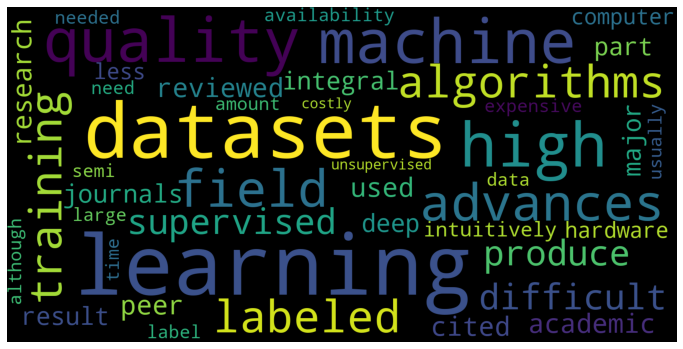

In [22]:
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

class WordCloudGeneration:
    def preprocessing(self, data):
        # convert all words to lowercase
        data = [item.lower() for item in data]
        # load the stop_words of english
        stop_words = set(stopwords.words('english'))
        # concatenate all the data with spaces.
        paragraph = ' '.join(data)
        # tokenize the paragraph using the inbuilt tokenizer
        word_tokens = word_tokenize(paragraph) 
        # filter words present in stopwords list 
        preprocessed_data = ' '.join([word for word in word_tokens if not word in stop_words])
        print("\n Preprocessed Data: " ,preprocessed_data)
        return preprocessed_data

    def create_word_cloud(self, final_data):
        # initiate WordCloud object with parameters width, height, maximum font size and background color
        # call the generate method of WordCloud class to generate an image
        wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color="black").generate(final_data)
        # plt the image generated by WordCloud class
        plt.figure(figsize=(12,10))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

wordcloud_generator = WordCloudGeneration()
# you may uncomment the following line to use custom input
# input_text = input("Enter the text here: ")
input_text = 'These datasets are used for machine-learning research and have been cited in peer-reviewed academic journals. Datasets are an integral part of the field of machine learning. Major advances in this field can result from advances in learning algorithms (such as deep learning), computer hardware, and, less-intuitively, the availability of high-quality training datasets.[1] High-quality labeled training datasets for supervised and semi-supervised machine learning algorithms are usually difficult and expensive to produce because of the large amount of time needed to label the data. Although they do not need to be labeled, high-quality datasets for unsupervised learning can also be difficult and costly to produce.'
input_text = input_text.split('.')
clean_data = wordcloud_generator.preprocessing(input_text)
wordcloud_generator.create_word_cloud(clean_data)
